## Relax, Inc.-  User Engagement Data Science Challenge

The data is available as two attached CSV files:

- takehome_user_engagement. csv
- takehome_users . csv

The data has the following two tables:

**1. A user table ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:**

- name: the user's name
- object_id: the user's id
- email: email address
- creation_source: how their account was created. This takes on one of 5 values:

    - PERSONAL_PROJECTS: invited to join another user'spersonal workspace
    - GUEST_INVITE: invited to an organization as a guest(limited permissions)
    - ORG_INVITE: invited to an organization (as a full member)
    - SIGNUP: signed up via the website
    - SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
- creation_time: when they created their account
- last_session_creation_time: unix timestamp of last login
- opted_in_to_mailing_list: whether they have opted into receiving marketing emails
- enabled_for_marketing_drip: whether they are on the regular marketing email drip
- org_id: the organization (group of users) they belong to
- invited_by_user_id: which user invited them to join (if applicable).

**2. A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.**


**Goal**

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .

We suggest spending 12 hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [21]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [22]:
# Read " takehome_user_engagment" file into dataframe 
eng_df=pd.read_csv('takehome_user_engagement.csv',parse_dates=['time_stamp'],infer_datetime_format=True)

In [23]:
eng_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [24]:
# check data types of df 
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [25]:
# adopted users -> user who has logged into the product on three seperate days in at least one seven day period
# identify adopted users by weekly activity
#create list of adopted users 
adopted_df=eng_df.copy()
adopted_df['time_stamp']=adopted_df['time_stamp'].dt.strftime('%W')
wk_ct=adopted_df.groupby(['user_id','time_stamp'])['visited'].sum()
adopted_ct=wk_ct[wk_ct >=3]
adopted_ct=adopted_ct.unstack().fillna(0).reset_index()
adopted_users=adopted_ct['user_id'].tolist()

In [26]:
# identified adopted users
print(len(adopted_users))

1444


In [27]:
users=set(adopted_df['user_id'])
print(len(users))

8823


In [28]:
# % of adopted users
print(f' % of adopted users : {len(adopted_users)/len(users)*100 :.02f}')

 % of adopted users : 16.37


In [29]:
# total visits for each user
visited_count=eng_df.groupby('user_id')['visited'].count().to_frame()

In [30]:
# read takehome_users.csv file into dataframe : users_df
users_df=pd.read_csv('takehome_users.csv',encoding='latin-1',index_col='object_id',parse_dates=['creation_time','last_session_creation_time'])

In [31]:
# Merge two data frames 
users_df=users_df.merge(visited_count,left_index=True,right_index=True)

In [32]:
# add adopted users to the dataframe
users_df['adopted']=users_df.index.isin(adopted_users).astype(int)

In [33]:
users_df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,adopted
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0,1,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0,14,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0,1,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0,1,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0,1,0


In [34]:
# check data types on users_df 
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 11 columns):
creation_time                 8823 non-null datetime64[ns]
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null object
last_session_creation_time    8823 non-null object
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            4776 non-null float64
visited                       8823 non-null int64
adopted                       8823 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(4)
memory usage: 792.7+ KB


In [35]:
# change last_session to datetime
users_df['last_session_creation_time']=pd.to_datetime(users_df['last_session_creation_time'].astype(int),unit='s')

In [36]:
# Change creation source to categorical
users_df.creation_source = users_df.creation_source.astype('category')

In [37]:
# compute login stats for each unadopted users
users_df[users_df.adopted == False]['visited'].min()

1

In [38]:
#  login statistics for each unadopted users
unadopted_min = users_df[users_df.adopted == False]['visited'].min()
unadopted_max = users_df[users_df.adopted == False]['visited'].max()
unadopted_mean = users_df[users_df.adopted == False]['visited'].mean()
unadopted_median = users_df[users_df.adopted == False]['visited'].median()

print('Unadopted User Statistics')
print('Min Logins: {0}\nMax Logins: {1}\nMean Logins: {2:.0f}\nMedian Logins: {3:.0f}'.format(unadopted_min, 
                                                                    unadopted_max,
                                                                    unadopted_mean,
                                                                    unadopted_median))

Unadopted User Statistics
Min Logins: 1
Max Logins: 34
Mean Logins: 2
Median Logins: 1


In [39]:
# login statistics for each adopted users
adopted_min = users_df[users_df.adopted == True]['visited'].min()
adopted_max = users_df[users_df.adopted == True]['visited'].max()
adopted_mean = users_df[users_df.adopted == True]['visited'].mean()
adopted_median = users_df[users_df.adopted == True]['visited'].median()

print('Adopted User Statistics')
print('Min Logins: {0}\nMax Logins: {1}\nMean Logins: {2: .0f}\nMedian Logins: {3:.0f}'.format(adopted_min, 
                                                                                     adopted_max, 
                                                                                     adopted_mean,
                                                                                     adopted_median))

Adopted User Statistics
Min Logins: 3
Max Logins: 606
Mean Logins:  136
Median Logins: 83


creation_source
GUEST_INVITE          0.205290
ORG_INVITE            0.154015
PERSONAL_PROJECTS     0.191099
SIGNUP                0.144889
SIGNUP_GOOGLE_AUTH    0.148736
Name: adopted, dtype: float64


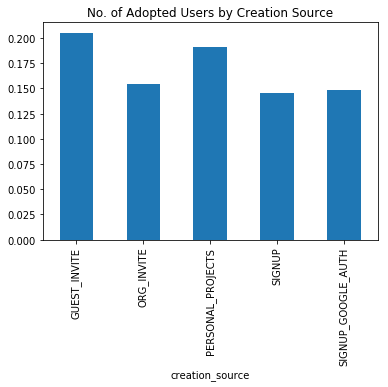

In [46]:
#plt.plot(users_df['visited'],users_df['adopted'])
print(users_df.groupby('creation_source')['adopted'].sum() / users_df.groupby('creation_source')['adopted'].count())

(users_df.groupby('creation_source')['adopted'].sum() / users_df.groupby('creation_source')['adopted'].count()).plot(kind='bar', 
                                                               title='No. of Adopted Users by Creation Source');

we can see invited as guests of organization and invited to join another member's personal project appear in high percentage  which indicate users are more likely to visit the platform if their is a social connection. The bar chart shows adoption rate for all users is less than 21%.


opted_in_to_mailing_list  adopted
0                         0          5531
                          1          1066
1                         0          1848
                          1           378
Name: adopted, dtype: int64


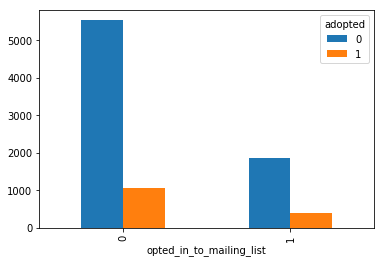

In [63]:
m_list = users_df.groupby(['opted_in_to_mailing_list','adopted'])['adopted'].count()
print(m_list)
m_list.unstack().plot(kind='bar');

In [64]:
m_list_unstack = m_list.unstack()

# Percent of adopted users based on mailing list status
m_list_unstack['pct'] = m_list_unstack.iloc[1] / m_list_unstack.sum(axis=1)
m_list_unstack

adopted,0,1,pct
opted_in_to_mailing_list,,,
0,5531,1066,0.280127
1,1848,378,0.169811


The Users who did not opt in the mailing list appear more likely to adopt to the platform


In [65]:
#  number of unique organizations
len(users_df.org_id.unique())

417

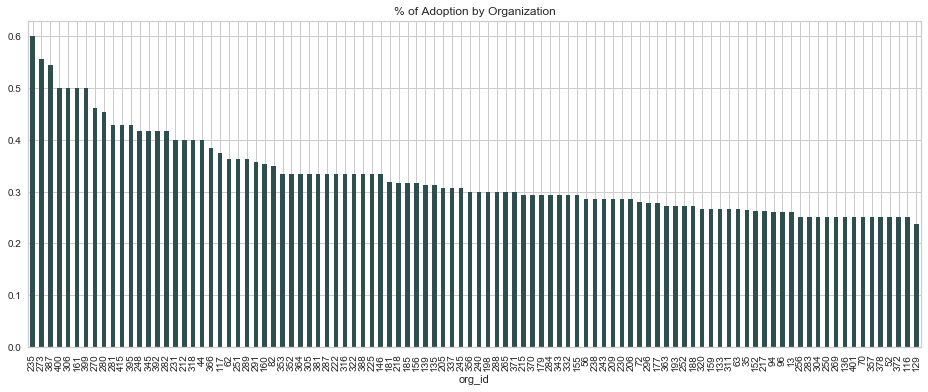

In [83]:
# Percent of adopted users by organization
org_adoption_percent = (users_df.groupby('org_id')['adopted'].sum() / users_df.groupby('org_id')['adopted'].count()).sort_values(ascending=False)

# the the 100 orgs with the highest adoption rate
org_adoption_percent[:100].plot(kind='bar',color='darkslategray', title='% of Adoption by Organization',figsize=(16,6));

We can see about 50 organizations with adoption rate over 33% and just 3 organizations with an adoption rate above 50%. Out of 417 organizations, this leaves a small percentage of organizations that are converting users to adoption.

We can see that there are only 3 organizations with an adoption rate above 50% and about 50 organizations with adoption above 33%. Out of 417 organizations, this leaves a small percentage of organizations that are converting users to adoption.



### Preprocessing steps for finding features that play important role in predicting adoption

In [84]:
# convert creation source categories to numerical codes
users_df['creation_source'] = pd.Categorical(users_df.creation_source).codes

In [85]:
# define features for gradient boosting model
features = users_df[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','visited']].copy()

In [86]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 6 columns):
creation_source               8823 non-null int8
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            4776 non-null float64
visited                       8823 non-null int64
dtypes: float64(1), int64(4), int8(1)
memory usage: 422.2 KB


Invited by user_id has missing values 

In [87]:
# convert missing data
features.invited_by_user_id.fillna(-1, inplace=True)

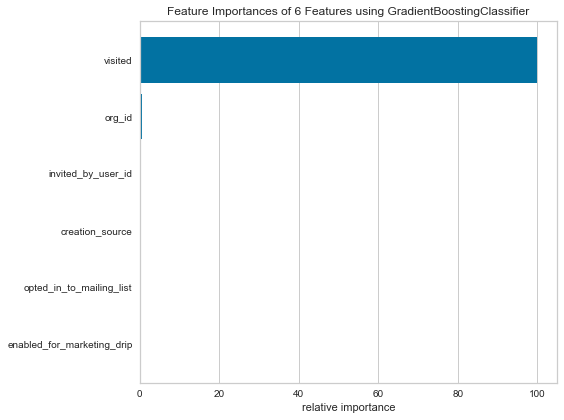

In [90]:
# plot feature importances using gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances

X = features
y = users_df.adopted

# Create a new matplotlib figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

feature_imp = FeatureImportances(GradientBoostingClassifier(random_state=42), ax=ax)
feature_imp.fit(X, y)
feature_imp.poof()

In [91]:
# see how well the baseline GB model performs
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

0.978021978021978

**Inference:**

-	16.33% of users are adopted users
-	We can see invited as guests of organization and invited to join another member's personal project appear in high percentage which indicate users are more likely to visit the platform if there is a social connection. It is suggested to shed light on social connection and see what the users and organizations who are inviting adopted users are doing differently. 
-	
-	The bar plot above shows that only 3 organizations have more than 50% of their users convert to adoption (and only about 50 of the 417 organizations convert more than 33%). It might be worth examining the difference between organizations that convert users to adopted versus those that don't.
-	
-	The Users who did not opt in the mailing list appear more likely to adopt to the platform
-	the most important factor in predicting whether a user will adopt the platform is the number of visits followed by org_id.
-	The mean number of logins for an unadopted user is 2 (with a max of 34) and the mean for an adopted user is 136 (with a max of 606). With gradient boosting algorithm we were able to create a model with accuracy of 97.8%
